# Comparing the optimization algorithms
Time it took to run all experiments (PSO, CSFLA, GA) 16829.31s user 3879.21s system 156% cpu 3:40:09.36 total

TODO:

Gather data from all experiments, grouped by month and configuration
Plot fitness results
Friedman test

In [7]:
# Libraries and helper functions
import pickle
import json
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def get_config(file='../config/config.json'):
    with open(file) as cfg_file:  
     return json.load(cfg_file)

def extract_month(filename):
    # Quick workaround to extract name from 10 min data files
    return filename[(filename.find('min_') + 4) :  filename.find('min_') + 10]

def get_all_config_results(cfg, filepath):
    # A bit messy. Creates a table of resulted fitness for each algorithm configuration on each month
    with open(filepath) as cfg_file:  
     all_cfg = json.load(cfg_file)
    df = pd.DataFrame(columns=['config name','data file','mdd', 'no_of_short_selling_transactions', 'no_of_transactions', 'noop', 'realised_profit', 'ret', 'u_buy', 'u_sell', 'value', 'wealth'])
    for config in all_cfg:
        for f in cfg['data']['files']:
            fp = '../' + all_cfg[config]['base_results_file_path'] + f + '/pickles/average_fitness.pickle'
            p = pd.Series(pickle.load(open(fp,"rb")), name=(config+' '+f))
            p['config name'] = config
            p['data file'] = f
            p['month'] = extract_month(f)
            df = df.append(p)
    return df

def get_ga_results(cfg):
    df = pd.DataFrame()
    for f in cfg['data']['files']:
        tdf = pd.read_csv('../' + cfg['ga']['base_results_file_path'] + f + '/average_fitness.csv').reset_index().drop('index',1)
        tdf['data file'] = f
        tdf['config name'] = 'ga'
        tdf['month'] = extract_month(f)
        df = df.append(tdf)
    return df

In [8]:
# Load data
cfg = get_config()
csfla = get_all_config_results(cfg, '../config/algos/csfla_param_exp_configs.json')
pso = get_all_config_results(cfg, '../config/algos/pso_param_exp_configs.json')
ga = get_ga_results(cfg)
results = csfla.append(pso.append(ga))

In [13]:
pso.mean()

mdd                                      0.000028
no_of_short_selling_transactions         0.000000
no_of_transactions                       2.617014
noop                                  2204.168056
realised_profit                         -0.058828
ret                                     -0.000012
u_buy                                    0.000000
u_sell                                   0.000000
value                                   -0.000017
wealth                              499999.941172
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

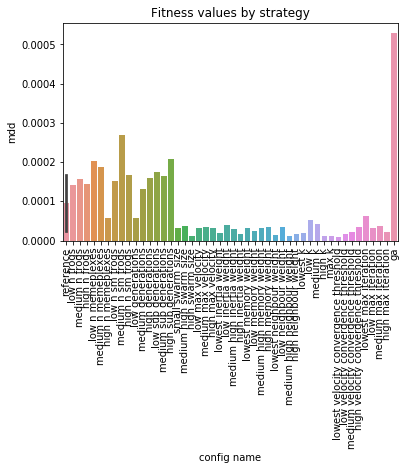

In [14]:
df = results.reset_index()

p = sns.barplot(x='config name', y='mdd', data=df).set_title('Fitness values by strategy')
plt.xticks(rotation=90)

## Average performance by algorithm

In [15]:
data = {'ga': ga['value'].mean(), 'pso': pso['value'].mean(), 'csfla': csfla['value'].mean()}
fits = pd.DataFrame.from_dict(data, orient='index')
fits.columns = ['value']
fits

,value
ga,-0.000275
pso,-0.000017
csfla,0.000009


In [16]:
# Save to csv to perform friedman test

df['performance rank'] = df['value'].rank(ascending = 0)
ndf = df[['data file', 'config name', 'value']]
ndf = ndf.pivot_table(index='data file', columns='config name', values='value')
ndf.to_csv('fitnessvalues.csv', sep=',')

## Average fitness per strategy


In [17]:
avg_fits = ndf.mean()
rankings = avg_fits.rank(ascending=0)
avg = pd.DataFrame(avg_fits, columns=['value'])
avg['performance rank'] = rankings
avg = avg.sort_values(by=['value'], ascending=0)
avg

,value,performance rank
config name,,
high sub generations,3.009558e-05,1.0
low sub generations,2.844087e-05,2.0
high generations,2.599885e-05,3.0
high n sm frogs,2.370044e-05,4.0
low n frogs,2.064937e-05,5.0
medium n memeplexes,1.881765e-05,6.0
high n frogs,1.340456e-05,7.0
medium sub generations,1.168038e-05,8.0
low n memeplexes,9.979909e-06,9.0


## Conclusion
On these 9 months of test data of the EUR/GBP currency pair, we can see that both CSFLA and PSO greatly outperform the GA. 

We can see that expensive strategies tend to perform better, which could indicate that their performance is correlated with compute power, which is very promising: the more computation is invested in the algorithm, the better the results.

Quite surprisingly, the CSFLA performs better than the PSO, even though more resources where attributed to the PSO

## TODO:
Add to the previous DF a notion of time

In [229]:
execution_time_three_months = pd.DataFrame.from_dict({'pso reference': 84.93, 'exploratory cheap': 26.42, 'exploratory expensive': 2553.77, 'exploitatory cheap': 172.00, 'exploitatory expensive': 1825.04,
                                                      'csfla reference': 48.00, 'extreme niching cheap': 125.14, 'extreme niching expensive': 177.83, 'global cheap': 52.38, 'global expensive': 81.58,
                                                       'ga': 280.03}, orient='index')

In [230]:
execution_time_three_months

,0
pso reference,84.93
exploratory cheap,26.42
exploratory expensive,2553.77
exploitatory cheap,172.00
exploitatory expensive,1825.04
csfla reference,48.00
extreme niching cheap,125.14
extreme niching expensive,177.83
global cheap,52.38
global expensive,81.58


In [234]:
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = execution_time_three_months.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)


In [239]:
execution_time_three_months['norm'] = df_normalized.values
execution_time_three_months.columns = ['execution time on 3 months', 'normalised execution time']

In [242]:
execution_time_three_months

,execution time on 3 months,normalised execution time
pso reference,84.93,0.023151
exploratory cheap,26.42,0.000000
exploratory expensive,2553.77,1.000000
exploitatory cheap,172.00,0.057602
exploitatory expensive,1825.04,0.711662
csfla reference,48.00,0.008539
extreme niching cheap,125.14,0.039061
extreme niching expensive,177.83,0.059909
global cheap,52.38,0.010272
global expensive,81.58,0.021825


In [252]:
avg = avg.join(execution_time_three_months)
avg

ValueError: columns overlap but no suffix specified: Index(['execution time on 3 months', 'normalised execution time'], dtype='object')

In [256]:
time_ranks = avg['normalised execution time'].rank(ascending=1)
avg['execution time rank'] = time_ranks
avg

,value,performance rank,execution time on 3 months,normalised execution time,execution time rank
config name,,,,,
extreme niching expensive,-0.000223,1.0,177.83,0.059909,8.0
exploitatory expensive,-0.000234,2.0,1825.04,0.711662,10.0
extreme niching cheap,-0.000238,3.0,125.14,0.039061,6.0
global cheap,-0.000279,4.0,52.38,0.010272,3.0
exploratory cheap,-0.000293,5.0,26.42,0.000000,1.0
pso reference,-0.000309,6.0,84.93,0.023151,5.0
exploratory expensive,-0.000405,7.0,2553.77,1.000000,11.0
csfla reference,-0.000455,8.0,48.00,0.008539,2.0
global expensive,-0.000555,9.0,81.58,0.021825,4.0


## Ranking time and performance

In [260]:
avg[['performance rank', 'execution time rank']]

,performance rank,execution time rank
config name,,
extreme niching expensive,1.0,8.0
exploitatory expensive,2.0,10.0
extreme niching cheap,3.0,6.0
global cheap,4.0,3.0
exploratory cheap,5.0,1.0
pso reference,6.0,5.0
exploratory expensive,7.0,11.0
csfla reference,8.0,2.0
global expensive,9.0,4.0


This table shows the time and performance ranking of each config.
We can see that out of 11 configurations, 9 outperform ga in terms of fitness, and 8 outperform the ga in terms of time.

7 configurations simultaneaously outperform the GA in both time and performance.
